# LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERNSHIP"

## LGMVIP July-22

### _Author - Zecil Jain_

### Task - 10 ML Facial recognition to detect mood and suggest songs accordingly

This project is aimed at developing a machine learning model to analyze an image and detect the mood expressed in that image. According to the mood the model should further suggest songs as well.

We will be using Tensorflow and CNN for the purpose of model development.

Dataset Link: https://www.kaggle.com/datasets/msambare/fer2013

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

import datetime
import os
import cv2

import tensorflow as tf
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

from keras import regularizers
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils.vis_utils import plot_model

from sklearn.metrics import classification_report, confusion_matrix

main_accent_colour = "#b366ff"
dim_colour="darkgrey"
main_palette = ["#FBE5C0", "#DD9A30", "#F88379", "#FF6FC2", "purple", "#D086F6", "#B0D2C2", "#4C5D70", "#6FA2CE", "#382D24", "#3ACF3A", "#7D7D00"]

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
train_set = 'E:/Data-Science-Projects/LGMVIP--DataScience/Task -10/train/'
test_set = 'E:/Data-Science-Projects/LGMVIP--DataScience/Task -10/test/'

rows = 48
cols = 48
classes = len(os.listdir('E:/Data-Science-Projects/LGMVIP--DataScience/Task -10/train'))

In [3]:
print("Train Set :")

train_count = []
for folder in os.listdir(train_set) :
    print(folder, "folder contains\t\t", len(os.listdir(train_set+folder)), "image")
    train_count.append(len(os.listdir(train_set+folder)))
    
print()

test_count = []
print("Test Set :")
for folder in os.listdir(test_set) :
    print(folder, "folder contains\t\t", len(os.listdir(test_set+folder)), "images")
    test_count.append(len(os.listdir(test_set+folder)))

Train Set :
angry folder contains		 3995 image
disgust folder contains		 436 image
fear folder contains		 4097 image
happy folder contains		 7215 image
neutral folder contains		 4965 image
sad folder contains		 4830 image
surprise folder contains		 3171 image

Test Set :
angry folder contains		 958 images
disgust folder contains		 111 images
fear folder contains		 1024 images
happy folder contains		 1774 images
neutral folder contains		 1233 images
sad folder contains		 1247 images
surprise folder contains		 831 images


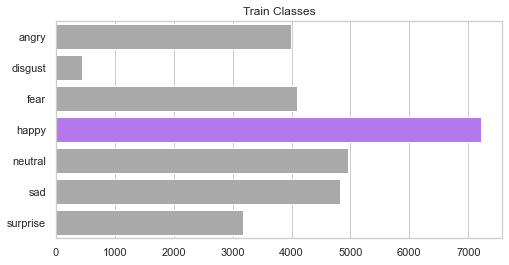

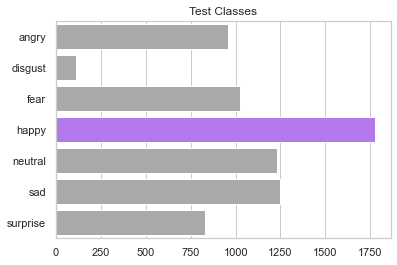

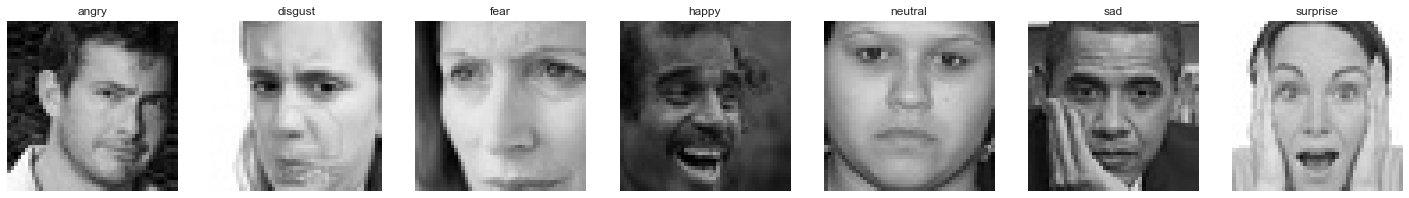

In [4]:
vals = ["happy"]
palette = {c: dim_colour if c not in vals else main_accent_colour for c in os.listdir(train_set)}

plt.figure(figsize=(8,4))

ax = sns.barplot(y=os.listdir(train_set),
                 x=train_count,
                 palette=palette,
                 orientation="horizontal",
).set(title='Train Classes')

plt.show()

print()

ax = sns.barplot(y=os.listdir(test_set),
                 x=test_count,
                 palette=palette,
                 orientation="horizontal",
).set(title='Test Classes')

plt.show()

print()

plt.figure(figsize=(25,25))

i = 1
for folder in os.listdir(train_set):
    
    img = load_img((train_set + folder +'/'+ os.listdir(train_set + folder)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(folder)
    plt.axis('off')
    i += 1
    
plt.show()

## Data Preprocessing

In [5]:
gen_train_data = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   horizontal_flip=True)

training_set = gen_train_data.flow_from_directory(train_set,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

gen_test_data = ImageDataGenerator(rescale=1./255)
testing_set = gen_test_data.flow_from_directory(test_set,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [6]:
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

## Building Model

In [7]:
def get_model(input_size, classes=7):
    
    model = tf.keras.models.Sequential()   

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape =input_size))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(classes, activation='softmax'))

    model.compile(optimizer=Adam(lr=0.0001, decay=1e-6), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

In [8]:
fernet = get_model((rows,cols,1), classes)
fernet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       7

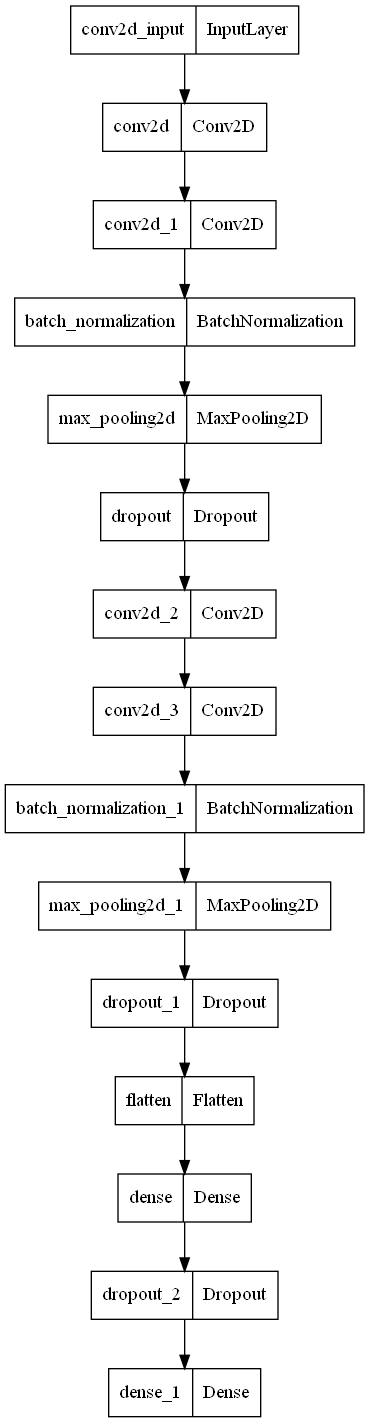

In [9]:
plot_model(fernet, show_layer_names=True)

## Checkpoint

In [10]:
chk_path = 'ferNet.h5'
log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_accuracy')

earlystop = EarlyStopping(monitor='val_accuracy', 
                          min_delta=0, 
                          patience=3, 
                          verbose=1, 
                          restore_best_weights=True)
                        
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                              factor=0.2, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = CSVLogger('training.log')

callbacks = [checkpoint, reduce_lr, csv_logger]

In [11]:
steps_per_epoch = training_set.n // training_set.batch_size
validation_steps = testing_set.n // testing_set.batch_size

hist = fernet.fit(x=training_set,
                  validation_data=testing_set,
                  epochs=20,
                  callbacks=callbacks,
                  steps_per_epoch=steps_per_epoch,
                  validation_steps=validation_steps)

Epoch 1/20
448/448 [==============================] - ETA: 0s - loss: 4.3339 - accuracy: 0.2809
Epoch 1: val_loss improved from inf to 9.66177, saving model to ferNet.h5
448/448 [==============================] - 918s 2s/step - loss: 4.3339 - accuracy: 0.2809 - val_loss: 9.6618 - val_accuracy: 0.0452 - lr: 1.0000e-04
Epoch 2/20
448/448 [==============================] - ETA: 0s - loss: 3.5107 - accuracy: 0.3396
Epoch 2: val_loss improved from 9.66177 to 3.16681, saving model to ferNet.h5
448/448 [==============================] - 624s 1s/step - loss: 3.5107 - accuracy: 0.3396 - val_loss: 3.1668 - val_accuracy: 0.3979 - lr: 1.0000e-04
Epoch 3/20
448/448 [==============================] - ETA: 0s - loss: 2.9958 - accuracy: 0.3726
Epoch 3: val_loss improved from 3.16681 to 2.74711, saving model to ferNet.h5
448/448 [==============================] - 637s 1s/step - loss: 2.9958 - accuracy: 0.3726 - val_loss: 2.7471 - val_accuracy: 0.4201 - lr: 1.0000e-04
Epoch 4/20
448/448 [===============

We have successfully completed the model training stage with a final accuracy of 63.93%, which is pretty acceptable considering the number of epochs we took. We can increase the number of epochs if we have a more powerful system or much more time to process the inputs over a longer stretch to get an even higher accuracy.

## Model Evaluation

Two plots will be developed - "Model Loss" and "Model Accuracy"
These plots will give us an insight into how the variation occurred during the training stage and at which value exactly did our plots take a turn for either good or bad.

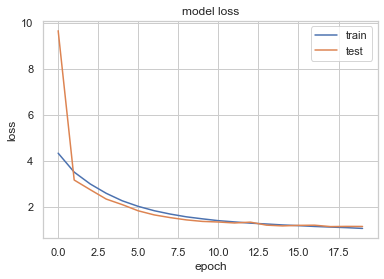

In [13]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

The above "Model Loss" plot clearly shows us that the initial loss in test set was much higher than that of training set but the percentage of decrease of Model Loss was also much greater and more drastic as well as spontaneous in test set than in training set which saw a steady decline in the loss value.

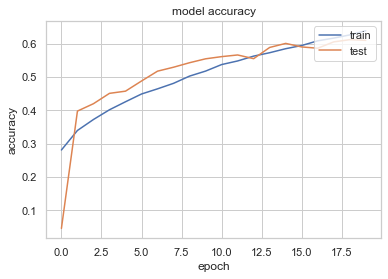

In [14]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

The above "Model Accuracy" plot clearly shows us that between 0 and 1, our model saw spontaneous rise in the accuracy for test set after which it was a steady and gradual increase in the accuracy for test set. This was not visible in the training set which, for its entirety of duration saw a steady increase in the accuracy and had a much smoother curvature than the test set.

Next, we will evaluate the model for both training and test sets and print their respective accuracies to see the difference.

In [15]:
train_loss, train_acc = fernet.evaluate(training_set)
test_loss, test_acc = fernet.evaluate(testing_set)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

113/113 [==============================] - 35s 306ms/step - loss: 1.1464 - accuracy: 0.6106
final train accuracy = 67.33 , validation accuracy = 61.06


As we can clearly see, training accuracy is visibly higher by a small margin than the testing accuracy. This is because the model faced an unseen dataset incase of testing accuracy and got evaluated on the basis of that whereas the training set was already familier to the model and hence was better at that.

Next we will plot the classification report and plot a heatmap for both training and testing sets and see the values of all important attributes and also the correlation between different features.

#### 1. Training Set Classification Report and Heatmap

Confusion Matrix
[[ 357   57  315 1111  842  992  321]
 [  42    8   34  118   96  103   35]
 [ 367   37  286 1164  909 1010  324]
 [ 630   81  541 2010 1573 1818  562]
 [ 417   48  405 1317 1064 1298  416]
 [ 435   47  382 1344 1026 1234  362]
 [ 284   37  236  880  679  802  253]]
Classification Report
              precision    recall  f1-score   support

       angry       0.14      0.09      0.11      3995
     disgust       0.03      0.02      0.02       436
        fear       0.13      0.07      0.09      4097
       happy       0.25      0.28      0.27      7215
     neutral       0.17      0.21      0.19      4965
         sad       0.17      0.26      0.20      4830
    surprise       0.11      0.08      0.09      3171

    accuracy                           0.18     28709
   macro avg       0.14      0.14      0.14     28709
weighted avg       0.17      0.18      0.17     28709



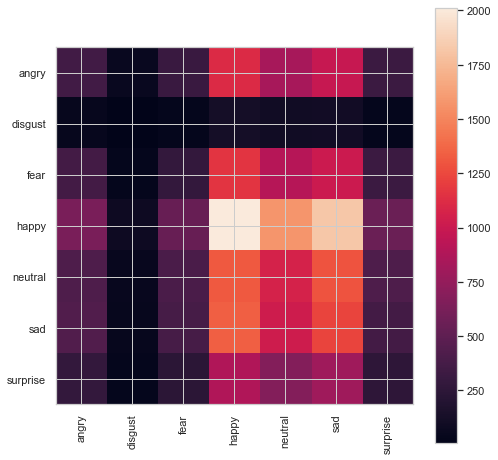

In [16]:
y_pred = fernet.predict(training_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = testing_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

cm_train = confusion_matrix(training_set.classes, y_pred)
print('Confusion Matrix')
print(cm_train)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(training_set.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

#### 1. Test Set Classification Report and Heatmap

Confusion Matrix
[[ 94   5  76 258 242 208  75]
 [  7   1  11  41  17  28   6]
 [ 94   9  88 271 238 231  93]
 [162  22 140 483 461 357 149]
 [117  11  99 352 299 256  99]
 [123  10 100 321 299 294 100]
 [ 79   9  85 226 182 186  64]]
Classification Report
              precision    recall  f1-score   support

       angry       0.14      0.10      0.12       958
     disgust       0.01      0.01      0.01       111
        fear       0.15      0.09      0.11      1024
       happy       0.25      0.27      0.26      1774
     neutral       0.17      0.24      0.20      1233
         sad       0.19      0.24      0.21      1247
    surprise       0.11      0.08      0.09       831

    accuracy                           0.18      7178
   macro avg       0.15      0.15      0.14      7178
weighted avg       0.18      0.18      0.18      7178



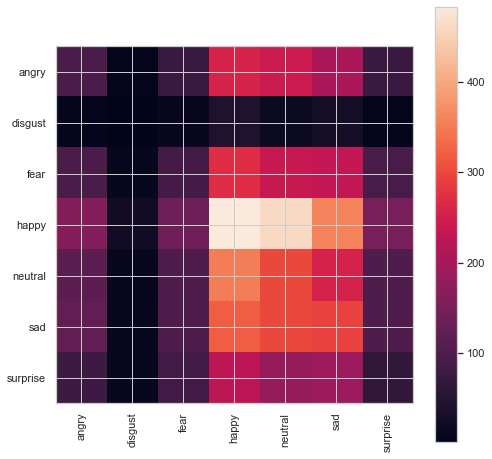

In [17]:
y_pred = fernet.predict(testing_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = testing_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

cm_test = confusion_matrix(testing_set.classes, y_pred)
print('Confusion Matrix')
print(cm_test)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(testing_set.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_test, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

## Making songs predictions based on mood

### Loading the mood-song dataset

In [19]:
mood_music = pd.read_csv("E:/Data-Science-Projects/LGMVIP--DataScience/Task -10/data_moods.csv")
mood_music = mood_music[['name','artist','mood']]
mood_music.head()

,name,artist,mood
0,1999,Prince,Happy
1,23,Blonde Redhead,Sad
2,9 Crimes,Damien Rice,Sad
3,99 Luftballons,Nena,Happy
4,A Boy Brushed Red Living In Black And White,Underoath,Energetic


### Loading a Sample Image for prediction

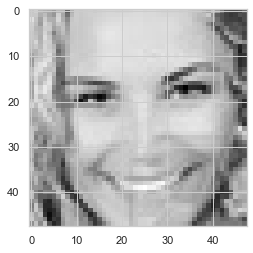

In [20]:
image = cv2.imread('E:/Data-Science-Projects/LGMVIP--DataScience/Task -10/test/happy/PrivateTest_10077120.jpg',cv2.IMREAD_GRAYSCALE)

plt.imshow(image,cmap='gray')
plt.show()

### Preprocessing the sample image

In [21]:
image = cv2.resize(image,(48,48))
img=np.array(image)
img=img.reshape(1,48,48,1)
predict_x=fernet.predict(img) 
result=np.argmax(predict_x,axis=1)
result[0]

3

### Suggesting songs based on mood

In [22]:
if(result[0]==0 or result[0]==1 or result[0]==2 ):
    #for angery,disgust,fear
    filter1=mood_music['mood']=='Calm'
    f1=mood_music.where(filter1)
    f1=f1.dropna()
    f2 =f1.sample(n=5)
    f2.reset_index(inplace=True)
    display(f2)
if(result[0]==3 or result[0]==4):
    #for happy, neutral
    filter1=mood_music['mood']=='Happy'
    f1=mood_music.where(filter1)
    f1=f1.dropna()
    f2 =f1.sample(n=5)
    f2.reset_index(inplace=True)
    display(f2)
if(result[0]==5):
       #for Sad
    filter1=mood_music['mood']=='Sad'
    f1=mood_music.where(filter1)
    f1=f1.dropna()
    f2 =f1.sample(n=5)
    f2.reset_index(inplace=True)
    display(f2)
if(result[0]==6):
     #for surprise
    filter1=mood_music['mood']=='Energetic'
    f1=mood_music.where(filter1)
    f1=f1.dropna()
    f2 =f1.sample(n=5)
    f2.reset_index(inplace=True)
    display(f2)

,index,name,artist,mood
0,236,Highway to Hell,AC/DC,Happy
1,563,The Safety Dance,Men Without Hats,Happy
2,205,Game Time (feat. Ninja),3LAU,Happy
3,512,Story Of A Violin,Sandro Silva,Happy
4,75,Bottom Of The Sea,Isaac Elton,Happy


As we can see, for the image of the mood - "Happy", the model successfully made correct predictions and suggested a list of songs which were expected. This proves the reliability of the model to successfully analyze any unseen dataset of images with any type of mood from mentioned 7 categories and then suggest songs on the basis of the moods expressed in those images of the dataset.

Hence we have successfully completed our task of developing a machine learning model for facial recognition to detect mood and suggest songs accordingly.